In [1]:
import pandas as pd
df=pd.read_csv("data.csv")

In [2]:
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
1,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
2,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
3,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
4,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

/home/sanju/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
val = df.values

In [5]:
minority = []
for value in val:
    if value[0] == 2:
        minority.append(value)

In [6]:
mino = np.asarray(minority)

In [7]:
mino.shape

(33, 3198)

In [8]:
val.shape

(3960, 3198)

In [9]:
for i in range(0, 30):
    val = np.append(mino, val, axis=0)

In [36]:
import random
random.shuffle(val)

In [24]:
val.shape

(4950, 3198)

In [37]:
y = val[:, 0]
X = val[:, 1:3179]

In [26]:
X

array([[  -38.88,   -33.83,   -58.54, ...,    -9.8 ,   -19.53,   -19.53],
       [  532.64,   535.92,   513.73, ...,    -6.53,    14.  ,    14.  ],
       [  532.64,   535.92,   513.73, ...,    -6.53,    14.  ,    14.  ],
       ..., 
       [  -11.09,   -16.4 ,   -22.64, ...,    47.48,    60.45,    67.87],
       [  145.84,   137.82,    96.99, ...,    56.59,    63.87,    63.87],
       [-1107.21, -1112.59, -1118.95, ...,  -539.29,  -672.71,  -672.71]])

In [27]:
y = y-1

In [28]:
print(y)

[ 1.  1.  1. ...,  0.  1.  1.]


In [29]:
X.shape

(4950, 3178)

In [38]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [39]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [32]:
print(model)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [33]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [34]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.94%


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['Exp','Not Exp']))

             precision    recall  f1-score   support

        Exp       1.00      1.00      1.00       773
    Not Exp       1.00      1.00      1.00       861

avg / total       1.00      1.00      1.00      1634



In [96]:
i = 0
for prediction in predictions:
    i = i+1
    if prediction == 1:
        print ("yo", i) 

yo 2
yo 3
yo 11
yo 15
yo 16
yo 20
yo 23
yo 24
yo 37
yo 39
yo 48
yo 51
yo 53
yo 69
yo 72
yo 79
yo 89
yo 90
yo 93
yo 97
yo 103
yo 107
yo 108
yo 110
yo 120
yo 124
yo 128
yo 134
yo 140
yo 147
yo 150
yo 154
yo 159
yo 161
yo 169
yo 170
yo 173
yo 174
yo 179
yo 182
yo 186
yo 191
yo 192
yo 193
yo 198
yo 199
yo 205
yo 208
yo 209
yo 211
yo 213
yo 215
yo 220
yo 227
yo 231
yo 233
yo 243
yo 247
yo 248
yo 249
yo 257
yo 266
yo 268
yo 275
yo 279
yo 280
yo 282
yo 296
yo 300
yo 304
yo 331
yo 336
yo 340
yo 343
yo 344
yo 352
yo 379
yo 381
yo 383
yo 386
yo 409
yo 412
yo 414
yo 417
yo 421
yo 428
yo 448
yo 449
yo 452
yo 454
yo 457
yo 461
yo 463
yo 470
yo 477
yo 484
yo 500
yo 503
yo 511
yo 516
yo 519
yo 528
yo 534
yo 543
yo 548
yo 552
yo 553
yo 561
yo 562
yo 564
yo 570
yo 572
yo 574
yo 576
yo 589
yo 594
yo 597
yo 598
yo 601
yo 602
yo 610
yo 611
yo 612
yo 613
yo 619
yo 621
yo 624
yo 625
yo 630
yo 633
yo 637
yo 648
yo 650
yo 651
yo 655
yo 656
yo 659
yo 666
yo 669
yo 670
yo 673
yo 682
yo 695
yo 701
yo 705
yo 721


In [98]:
j = 0
for prediction in y_test:
    j = j+1
    if prediction == 1:
        print ("yo", j)

yo 2
yo 3
yo 11
yo 15
yo 16
yo 20
yo 23
yo 24
yo 37
yo 39
yo 48
yo 51
yo 53
yo 69
yo 72
yo 79
yo 89
yo 90
yo 93
yo 97
yo 103
yo 107
yo 108
yo 110
yo 120
yo 124
yo 128
yo 134
yo 140
yo 147
yo 150
yo 154
yo 159
yo 161
yo 169
yo 170
yo 173
yo 174
yo 179
yo 182
yo 186
yo 191
yo 192
yo 193
yo 198
yo 199
yo 205
yo 208
yo 209
yo 211
yo 213
yo 215
yo 220
yo 227
yo 231
yo 233
yo 243
yo 247
yo 248
yo 249
yo 257
yo 266
yo 268
yo 275
yo 279
yo 280
yo 282
yo 296
yo 300
yo 304
yo 331
yo 336
yo 340
yo 343
yo 344
yo 352
yo 379
yo 381
yo 383
yo 386
yo 409
yo 412
yo 414
yo 417
yo 421
yo 428
yo 448
yo 449
yo 452
yo 454
yo 457
yo 461
yo 463
yo 470
yo 477
yo 484
yo 500
yo 503
yo 511
yo 516
yo 519
yo 528
yo 534
yo 543
yo 548
yo 552
yo 553
yo 561
yo 562
yo 564
yo 570
yo 572
yo 574
yo 576
yo 589
yo 594
yo 597
yo 598
yo 601
yo 602
yo 610
yo 611
yo 612
yo 613
yo 619
yo 621
yo 624
yo 625
yo 630
yo 633
yo 637
yo 648
yo 650
yo 651
yo 655
yo 656
yo 659
yo 666
yo 669
yo 670
yo 673
yo 682
yo 695
yo 701
yo 705
yo 721


In [79]:
f1_score(y_test,predictions, average='macro')

0.99818202047174021

In [80]:
f1_score(y_test, predictions , average='micro')

0.99877600979192172

In [81]:
f1_score(y_test, predictions, average='weighted') 

0.99877728171766089

In [82]:
f1_score(y_test, predictions, average=None ) 

array([ 0.99922118,  0.99714286])

In [83]:
f1_score(y_test, predictions)

0.99714285714285722

In [84]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predictions)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.99


In [85]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, predictions )

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [86]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions)

0.99430199430199429

In [87]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions)

1.0

In [88]:
from sklearn.metrics import roc_curve, auc,roc_auc_score

In [89]:
roc_auc_score(y_test,predictions,average='micro')

0.99922178988326849

In [90]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc= auc(fpr, tpr)

In [91]:
fpr

array([ 0.        ,  0.00155642,  1.        ])

In [92]:
tpr

array([ 0.,  1.,  1.])

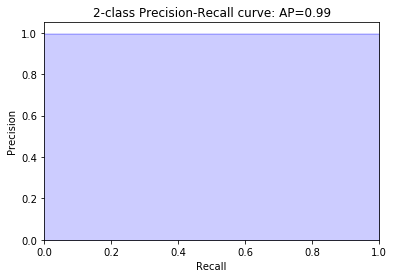

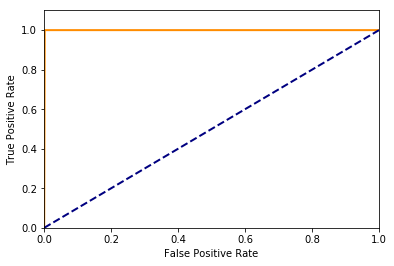

In [93]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
#plt.legend(loc="lower right")

plt.show()

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['Exp','Not Exp']))

             precision    recall  f1-score   support

        Exp       1.00      1.00      1.00      1285
    Not Exp       0.99      1.00      1.00       349

avg / total       1.00      1.00      1.00      1634

